In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
import xgboost as xgb
from pyearth import Earth

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
X = pd.read_csv('X_train.csv').drop(columns = "Unnamed: 0")
X_test = pd.read_csv('X_test.csv').drop(columns = "Unnamed: 0")
y = pd.read_csv('y_train.csv').drop(columns = "Unnamed: 0")
y_test = pd.read_csv('y_test.csv').drop(columns = "Unnamed: 0")

In [112]:
y = np.log(y)

In [130]:
y.mean()

totalyearlycompensation    197257.98981
dtype: float64

In [125]:
12954+8636

21590

In [121]:
value = 12.002732
size = 8636

y_pred = np.full(size, value)

mean_absolute_error(np.exp(y_pred), y_test)

87175.84070961976

# Linear Model

In [17]:
y.describe()

,totalyearlycompensation
count,1.295400e+04
mean,1.972580e+05
std,1.313298e+05
min,1.000000e+04
25%,1.190000e+05
50%,1.730000e+05
75%,2.450000e+05
max,4.980000e+06


In [113]:
# Create a model object - not trained yet
lr = LinearRegression()

# Train the model
lr.fit(X, y)

LinearRegression()

In [114]:
X_test.drop(index = 3415, inplace = True)
y_test.drop(index = 3415, inplace = True)

In [115]:
mean_absolute_error(np.exp(lr.predict(X_test)), y_test)

55484.18242534074

In [105]:
z = lr.predict(X_test)
z = z.tolist()
del w[z.index(max(z))]
del z[z.index(max(z))]
w = y_test.values.tolist()
w = np.array(w)
z = np.array(z)
mean_absolute_error(lr.predict(z), w)

ValueError: X has 1 features, but LinearRegression is expecting 106 features as input.

In [106]:
z

array([[116431.375],
       [138310.625],
       [310627.   ],
       ...,
       [189154.5  ],
       [182421.5  ],
       [103334.625]])

In [54]:
mean_absolute_error(lr.predict(X_test), y_test)

33822719334.732243

# Number of Trees vs. CV Error

>5 1.392 (0.002)
>10 0.642 (0.002)
>50 0.516 (0.006)
>100 0.515 (0.007)
>500 0.530 (0.006)
>1000 0.542 (0.005)
>2000 0.555 (0.005)
>5000 0.569 (0.005)


Text(0.5, 0, 'Number of trees')

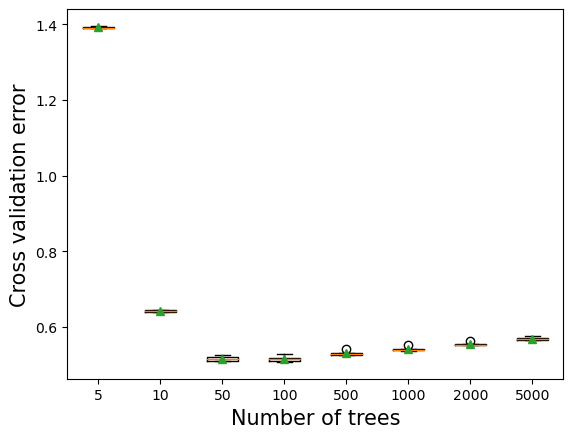

In [54]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [5, 10, 50, 100, 500, 1000, 2000, 5000]
    for n in n_trees:
        models[str(n)] = xgb.XGBRegressor(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

# Depth of Tree vs. CV Error

>1 0.544 (0.008)
>2 0.526 (0.009)
>3 0.518 (0.009)
>4 0.515 (0.010)
>5 0.514 (0.009)
>6 0.513 (0.009)
>7 0.514 (0.008)
>8 0.517 (0.008)
>9 0.520 (0.008)
>10 0.522 (0.009)
>11 0.524 (0.008)
>12 0.528 (0.008)
>13 0.530 (0.008)
>14 0.533 (0.008)
>15 0.535 (0.008)
>16 0.537 (0.008)
>17 0.540 (0.007)
>18 0.540 (0.007)
>19 0.539 (0.006)
>20 0.541 (0.007)


Text(0.5, 0, 'Depth of each tree')

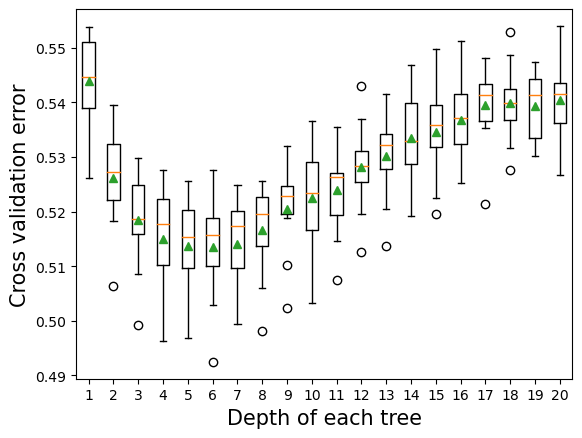

In [55]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 20
    for i in range(1,21):
        # define ensemble model
        models[str(i)] = xgb.XGBRegressor(random_state=1,max_depth=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

# Learning Rate vs. CV Error

>0.1000 0.5 (0.0)
>0.2000 0.5 (0.0)
>0.3000 0.5 (0.0)
>0.4000 0.5 (0.0)
>0.5000 0.5 (0.0)
>0.6000 0.5 (0.0)
>0.8000 0.5 (0.0)
>1.0000 0.6 (0.0)


Text(0.5, 0, 'Learning rate')

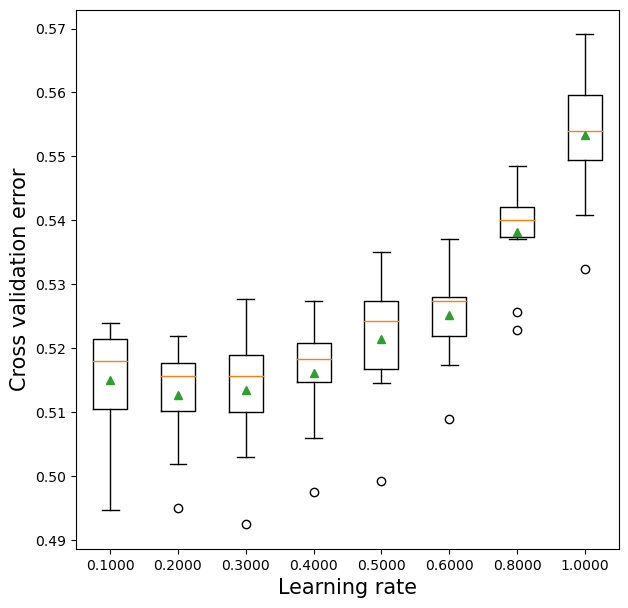

In [59]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(learning_rate=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

# Reg_lambda vs. CV Error

>0.0000 0.5 (0.0)
>0.5000 0.5 (0.0)
>1.0000 0.5 (0.0)
>1.5000 0.5 (0.0)
>2.0000 0.5 (0.0)
>10.0000 0.5 (0.0)
>100.0000 0.5 (0.0)


Text(0.5, 0, 'reg_lambda')

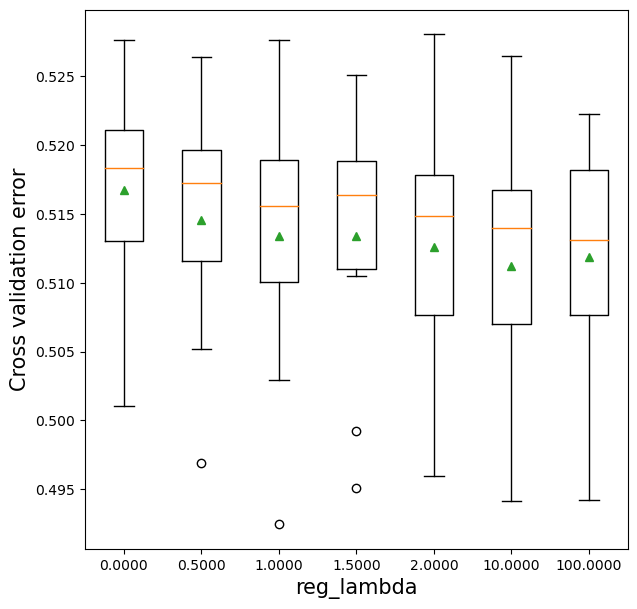

In [57]:
def get_models():
    models = dict()
    # explore 'reg_lambda' from 0.1 to 2 in 0.1 increments
    for i in [0,0.5,1.0,1.5,2,10,100]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(reg_lambda=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('reg_lambda',fontsize=15)

# Gamma vs. CV Error

>0.0000 0.5 (0.0)
>10.0000 0.5 (0.0)
>100.0000 0.6 (0.0)
>1000.0000 0.7 (0.0)
>10000.0000 0.7 (0.0)
>100000.0000 0.7 (0.0)
>1000000.0000 0.7 (0.0)
>10000000.0000 0.7 (0.0)
>100000000.0000 0.7 (0.0)
>1000000000.0000 0.7 (0.0)


Text(0.5, 0, 'gamma')

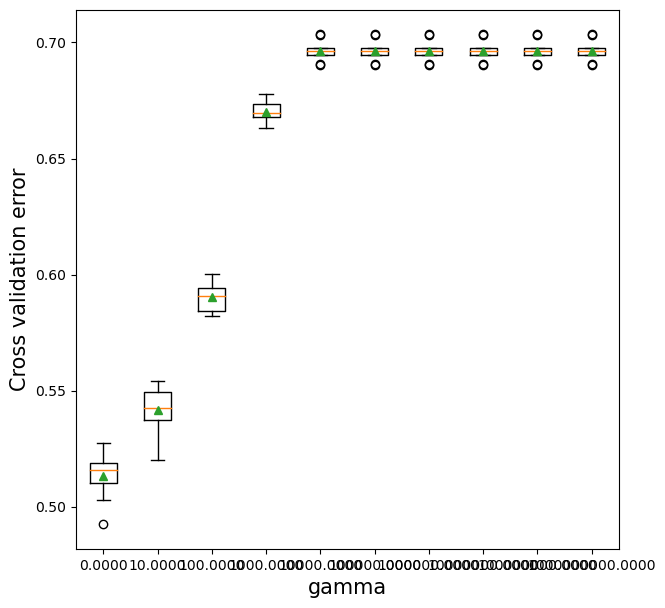

In [58]:
def get_models():
    models = dict()
    # explore gamma from 0.1 to 2 in 0.1 increments
    for i in [0,10,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(gamma=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('gamma',fontsize=15)

# Tuning

In [6]:
#Coarse Tuning
#K-fold cross validation to find optimal parameters for XGBoost
start_time = time.time()
param_grid = {'max_depth': [4,5,6,7],
              'learning_rate': [0.1,0.2,0.3],
               'reg_lambda':[2, 10],
                'n_estimators':[200],
                'gamma': [0, 10],
                'subsample': [0.3,0.4,0.5]}

cv = KFold(n_splits=2,shuffle=True,random_state=1)
optimal_params = RandomizedSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_distributions = param_grid, n_iter = 200,
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X,y)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)
print("Time taken = ", (time.time()-start_time)/60, " minutes")

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Optimal parameter values = {'subsample': 0.4, 'reg_lambda': 10, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}
Optimal cross validation R-squared =  0.6851588815224346
Time taken =  3.2389204184214275  minutes


In [11]:
#Coarse Tuning
#K-fold cross validation to find optimal parameters for XGBoost
start_time = time.time()
param_grid = {'max_depth': [4,5,6,7],
              'learning_rate': [0.1,0.2,0.3],
               'reg_lambda':[2, 10, 100],
                'n_estimators':[200],
                'gamma': [0, 10],
                'subsample': [0.3,0.4,0.5]}

cv = KFold(n_splits=2,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_grid = param_grid,
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X,y)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)
print("Time taken = ", (time.time()-start_time)/60, " minutes")

Fitting 2 folds for each of 216 candidates, totalling 432 fits
Optimal parameter values = {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_lambda': 10, 'subsample': 0.4}
Optimal cross validation R-squared =  0.6851588815224346
Time taken =  4.750239682197571  minutes


In [27]:
#Coarse Tuning
#K-fold cross validation to find optimal parameters for XGBoost
start_time = time.time()
param_grid = {'max_depth': [5,6],
              'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
               'reg_lambda':[10],
                'n_estimators':[200],
                'gamma': [0],
                'subsample': [0.35, 0.4, 0.45]}

cv = KFold(n_splits=2,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_grid = param_grid,
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X,y)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)
print("Time taken = ", (time.time()-start_time)/60, " minutes")

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Optimal parameter values = {'gamma': 0, 'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 200, 'reg_lambda': 10, 'subsample': 0.45}
Optimal cross validation R-squared =  0.6868453727512085
Time taken =  0.7517614165941874  minutes


In [34]:
#Coarse Tuning
#K-fold cross validation to find optimal parameters for XGBoost
start_time = time.time()
param_grid = {'max_depth': [5,6],
              'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
               'reg_lambda':[1,10],
                'n_estimators':[200],
                'gamma': [0,10],
                'subsample': [0.35, 0.4, 0.45]}

cv = KFold(n_splits=3,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_grid = param_grid,
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X,y)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)
print("Time taken = ", (time.time()-start_time)/60, " minutes")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Optimal parameter values = {'gamma': 0, 'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 200, 'reg_lambda': 10, 'subsample': 0.35}
Optimal cross validation R-squared =  0.6921717935894433
Time taken =  5.447802948951721  minutes


# MAE on Test Data

In [33]:
model = xgb.XGBRegressor(random_state = 1, max_depth = 6, learning_rate = 0.08,
                        n_estimators = 600,reg_lambda = 10, gamma = 0, subsample = 0.45).fit(X,y)
print("MAE on test data:",mean_absolute_error(np.exp(model.predict(X_test)),y_test))

MAE on test data: 47722.065500354576


In [38]:
model = xgb.XGBRegressor(random_state = 1, max_depth = 6, learning_rate = 0.08,
                        n_estimators = 600,reg_lambda = 10, gamma = 0, subsample = 0.35).fit(X,y)
print("MAE on test data:",mean_absolute_error(np.exp(model.predict(X_test)),y_test))

MAE on test data: 47922.211072728525


In [42]:
model = xgb.XGBRegressor(random_state = 1, max_depth = 6, learning_rate = 0.08,
                        n_estimators = 350,reg_lambda = 10, gamma = 0, subsample = 0.45).fit(X,y)
print("MAE on test data:",mean_absolute_error(np.exp(model.predict(X_test)),y_test))

MAE on test data: 47585.97253458956


In [116]:
model = xgb.XGBRegressor(random_state = 1, max_depth = 6, learning_rate = 0.08,
                        n_estimators = 450,reg_lambda = 10, gamma = 0, subsample = 0.75).fit(X,y)
print("MAE on test data:",mean_absolute_error(np.exp(model.predict(X_test)),y_test))

MAE on test data: 47490.79071528341


In [46]:
model = xgb.XGBRegressor(random_state = 1, max_depth = 6, learning_rate = 0.08,
                        n_estimators = 600,reg_lambda = 10, gamma = 0, subsample = 0.75).fit(X,y)
print("MAE on test data:",mean_absolute_error(np.exp(model.predict(X_test)),y_test))

MAE on test data: 47551.36340313658
